<StemContainer object of 3 artists>

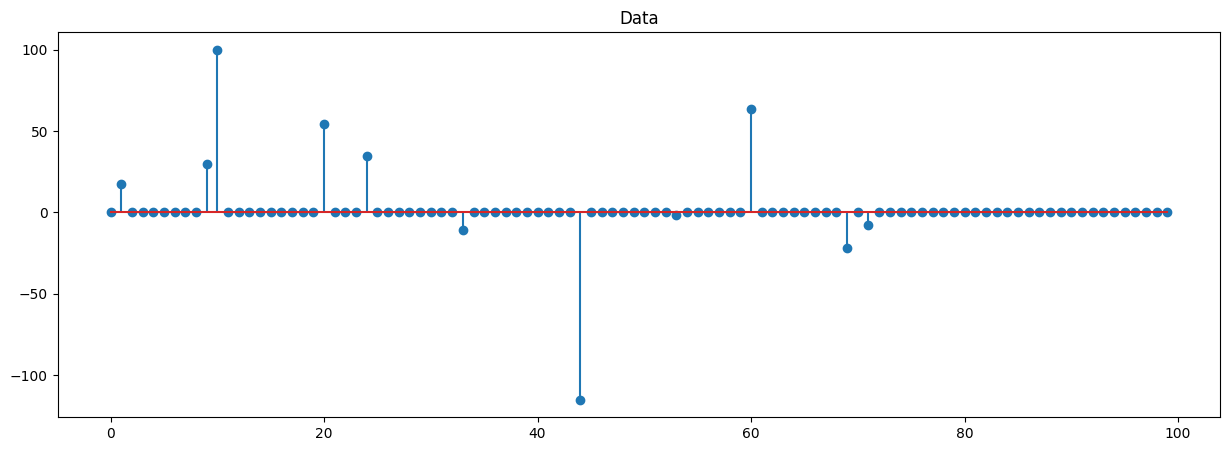

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def generate_signal(signal_length, num_nonzero):
    
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 50*np.random.randn(num_nonzero)  
    signal[nonzero_indices] = nonzero_values
    return signal

signal_length = 100  # Total length of the signal
num_nonzero = 10    # Number of non-zero elements in the signal
your_index_no=200289 # Enter without english letter and without leading zeros
signal = generate_signal(signal_length, num_nonzero)
signal[10] = (your_index_no % 10)*10 + 10
if  your_index_no % 10 == 0:
  signal[10] = np.random.randn(1) + 30


signal=signal.reshape(signal_length,1)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Data")
plt.stem(signal)


min of data -115.26276117129746 max of data 100.0
No. of non-zero elements in signal: 11
No. of non-zero elements in min-max-scaled: 99


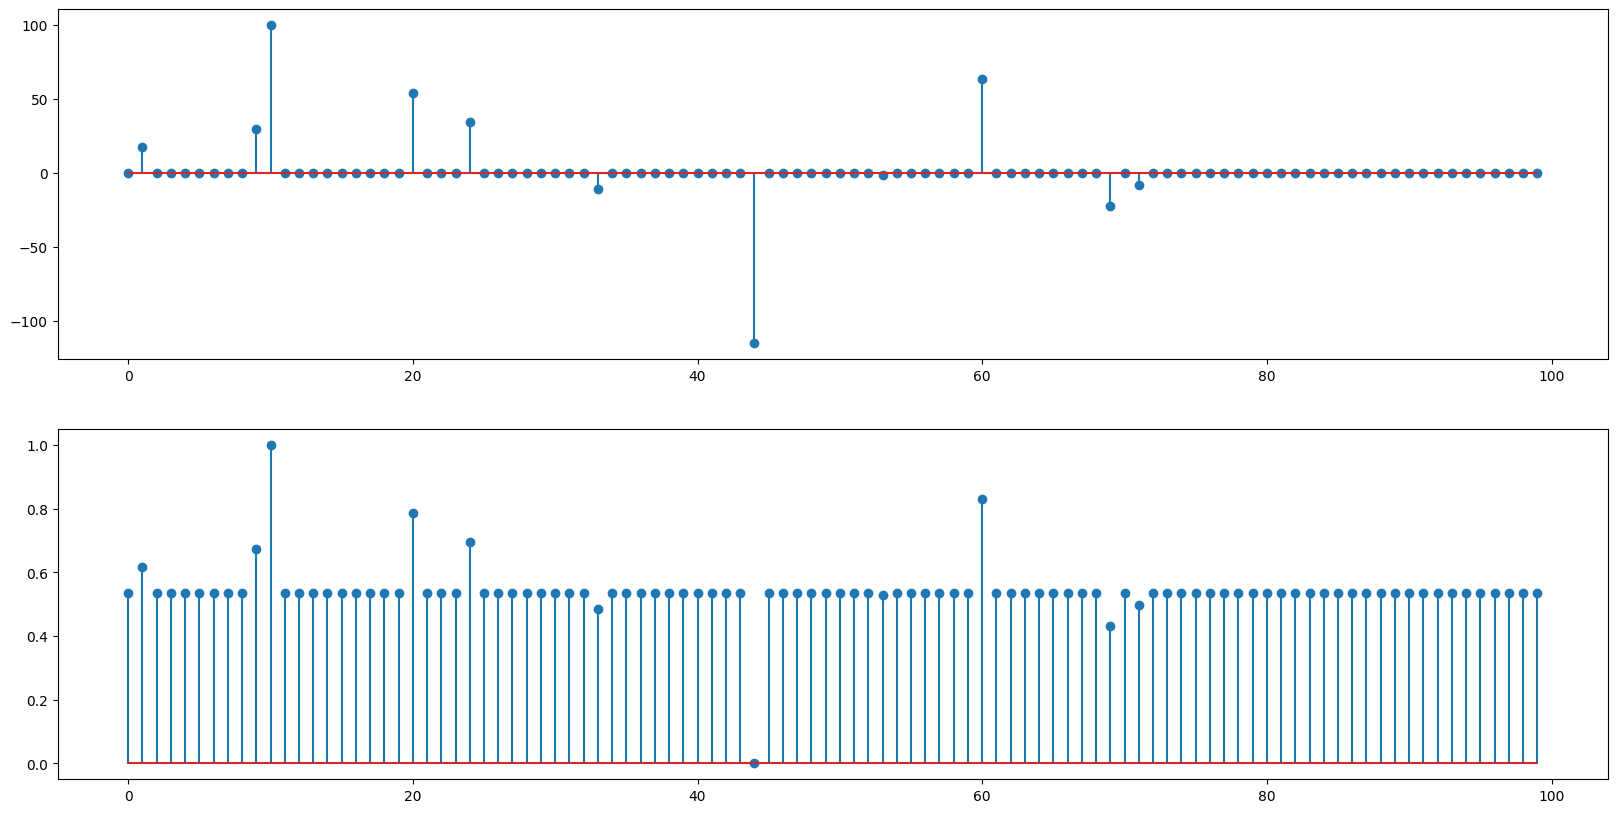

In [45]:
# Min Max scaler
def min_max_scale(data):
    min_val = np.min(data)
    max_val = np.max(data)
    print("min of data", min_val, "max of data", max_val)
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data


scaled_data_min_max = min_max_scale(signal)
f, ax = plt.subplots(2, 1, figsize = (20,10))
ax[0].stem(signal)

ax[1].stem(scaled_data_min_max)

count_signal = 0
count_normalized = 0

for i in range(len(signal)):
    if (signal[i]!=0):
        count_signal += 1
    if (scaled_data_min_max[i]!=0):
        count_normalized += 1
print("No. of non-zero elements in signal:", count_signal)
print("No. of non-zero elements in min-max-scaled:", count_normalized)

No. of non-zero elements in signal: 11
No. of non-zero elements in MaxAbsscaled data: 11


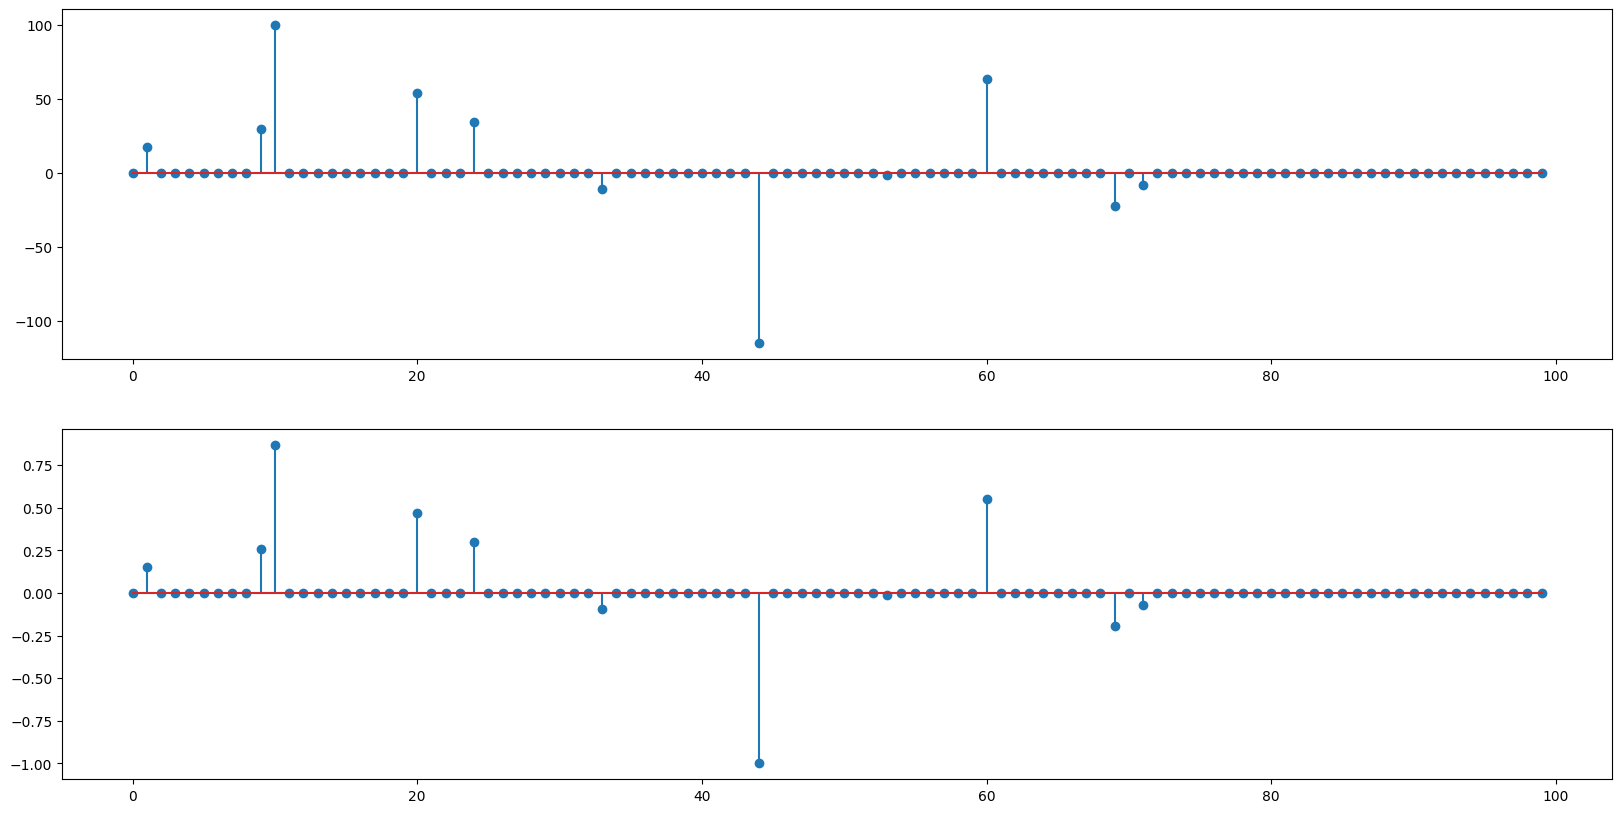

In [49]:
# MaxAbsScaler
import sklearn
from sklearn import preprocessing

max_scaled = preprocessing.MaxAbsScaler().fit(signal)
max_scaled = max_scaled.transform(signal)

f, ax = plt.subplots(2, 1, figsize = (20,10))
ax[0].stem(signal)

ax[1].stem(max_scaled)

count_signal = 0
count_normalized = 0

for i in range(len(signal)):
    if (signal[i]!=0):
        count_signal += 1
    if (max_scaled[i]!=0):
        count_normalized += 1
print("No. of non-zero elements in signal:", count_signal)
print("No. of non-zero elements in MaxAbsscaled data:", count_normalized)

No. of non-zero elements in signal: 11
No. of non-zero elements in standard normalized data: 100


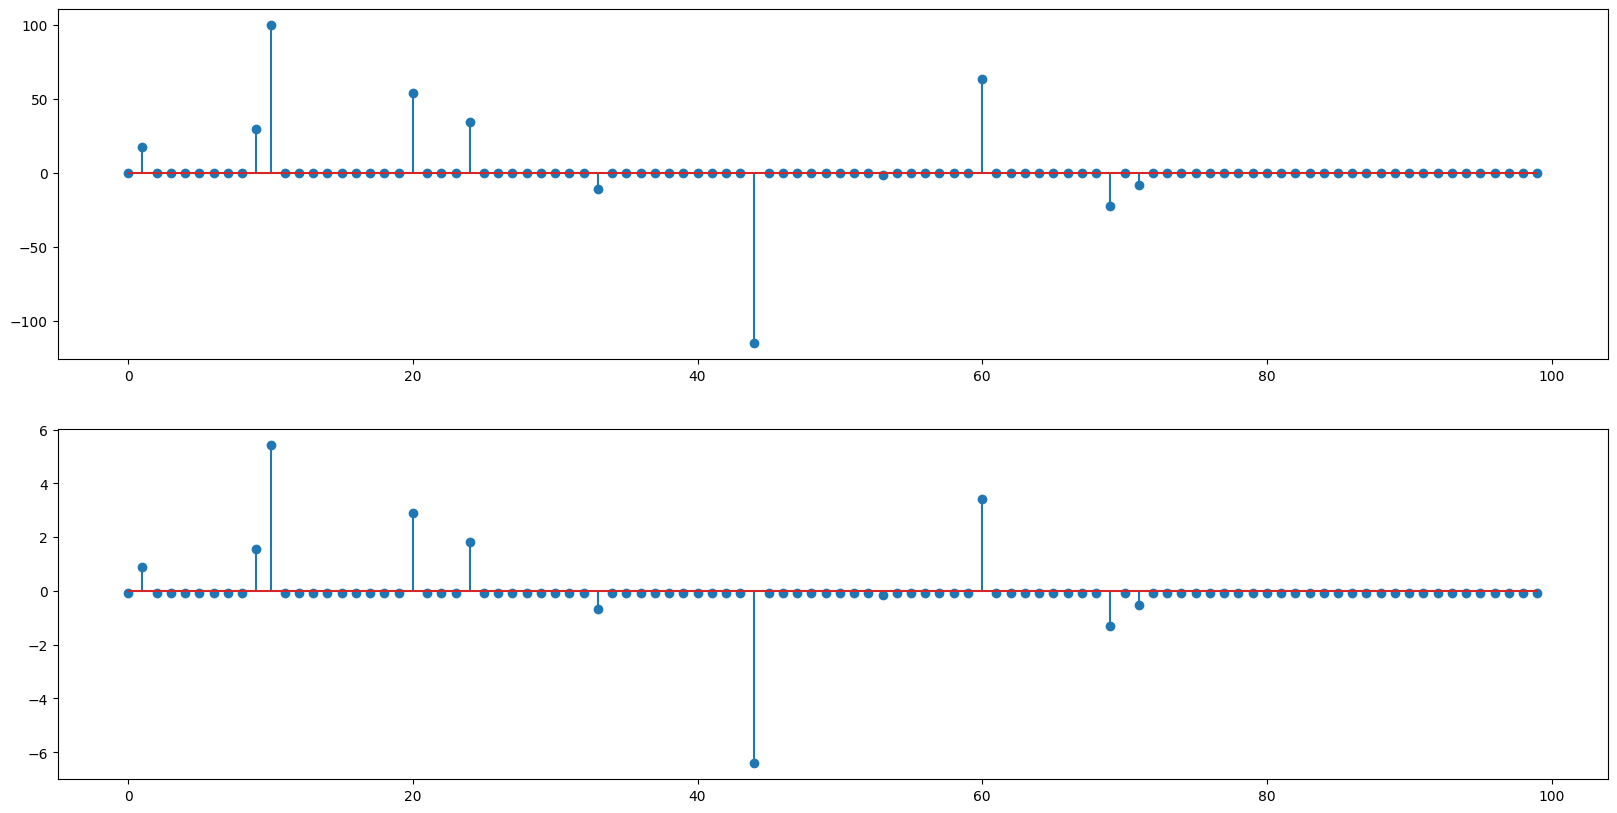

In [50]:
# Standard normalization 
def standard_normalization(data):
    mean = np.mean(data)
    stan_deviation = np.std(data)
    x_normalized = (data - mean)/stan_deviation
    return x_normalized

standard_normalized_data = standard_normalization(signal)

f, ax = plt.subplots(2, 1, figsize = (20,10))
ax[0].stem(signal)

ax[1].stem(standard_normalized_data)

count_signal = 0
count_normalized = 0

for i in range(len(signal)):
    if (signal[i]!=0):
        count_signal += 1
    if (standard_normalized_data[i]!=0):
        count_normalized += 1
print("No. of non-zero elements in signal:", count_signal)
print("No. of non-zero elements in standard normalized data:", count_normalized)

In [19]:
import pandas as pd

df = pd.read_csv("Advertising.csv")
print(df.head())

X = df.iloc[:,1:4]
print(X)
y = df.iloc[:,4]
print(y)

   sample index     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
        TV  radio  newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]
0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [48]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)
coef_tv = model.coef_[0]
coef_radio = model.coef_[1]
coef_newspaper = model.coef_[2]

# Print the coefficients
print("Coefficient for TV:", coef_tv)
print("Coefficient for Radio:", coef_radio)
print("Coefficient for Newspaper:", coef_newspaper)

Coefficient for TV: 0.044729517468716326
Coefficient for Radio: 0.18919505423437652
Coefficient for Newspaper: 0.0027611143413671935
